# Quantum classification

In this notebook, we see the dependence of trainability of the QML classifier on the circuit structure and the cost function.

The circuit structure is defined by two parts: the embedding part, the ansatz part.
- embedding part: the embedding circuit to encode input data into the quantum circuit.  
    You can use 6 types of embedding circuits:
    - Tensor Product Embedding (TPE)
    - Alternating Layered Embedding (ALE)
    - Hardware Efficient Embedding (HEE)
    - Classically Hard Embedding (CHE)
    - Matrix Product State Embedding (MPS)
    - Amplitude Embedding (APE)
- ansatz part: the parametrized circuit to learn the training dataset.  
    You can use 3 types of ansatz circuits:
    - Tensor Product Ansatz (TPA): the ansatz circuit is the tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Ansatz (HEA): the ansatz circuit is the tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Strongly Entangling Ansatz (SEA): the ansatz circuit that is strongly entangled.

On `HEE` and `CHE`, refer to [`Subtleties in the trainability of quantum machine learning models`](https://arxiv.org/abs/2110.14753) for details.

On `SEA`, refer to PennyLnae page: [embedding and ansatz](https://pennylane.readthedocs.io/en/stable/introduction/templates.html)

## 1. Iris dataset with 2 features and 2 labels

In [1]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

import sys
sys.path.append('..')
from src.quantum_classifier import QuantumClassifier

In [2]:
data = np.loadtxt("../data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features out of 4
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [3]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(80, 2) (80,)
(20, 2) (20,)


In [4]:
# settings
nqubits = X.shape[1]
embedding_nlayers = 1
ansatz_nlayers = 2
embedding_type = "TPE"
ansatz_type = "TPA"
cost_type = "MSE"
label = f"{embedding_type}, {ansatz_type}"

iris22 = QuantumClassifier(
    x_train,
    y_train,
    nqubits,
    embedding_nlayers,
    ansatz_nlayers,
    embedding_type,
    ansatz_type,
    cost_type,
    shots=None,
    stepsize=0.1,
    steps=50,
)

(<Figure size 900x300 with 1 Axes>, <Axes: >)

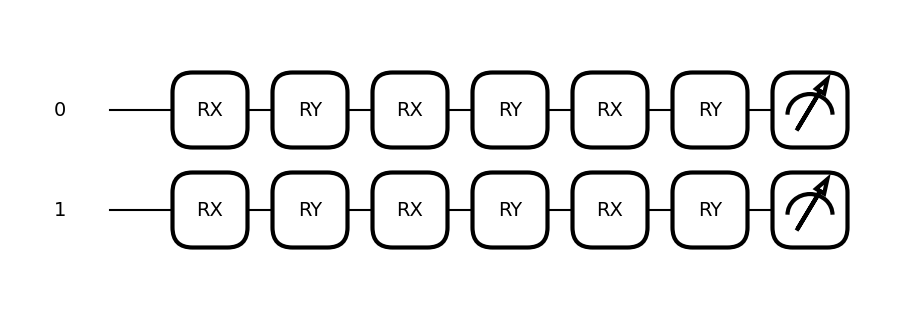

In [5]:
iris22.draw_circuit(decompose=True)

In [6]:
iris22.optimize()

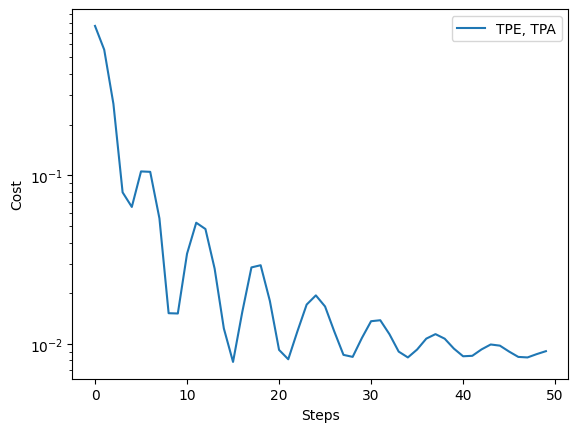

In [7]:
iris22.plot_cost()

In [8]:
print('accuracy ', iris22.accuracy(x_test, y_test))
print('optimized cost; ', iris22.cost_list[-1])

accuracy  1.0
optimized cost;  0.00907759329177795


## 2. Iris dataset with 4 features and 2 labels

In [9]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

import sys
sys.path.append('..')
from src.quantum_classifier import *

In [8]:
data = np.loadtxt("../data/iris_classes1and2_scaled.txt")
X = data[:,:4] # use first 4 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
for i in range(3):
    print(x_train[i], y_train[i])

[0.7  0.5  1.6  0.55] 1.0
[0.4  0.75 0.2  0.05] -1.0
[0.45 1.05 0.25 0.  ] -1.0


In [10]:
# settings
nqubits = X.shape[1]
embedding_nlayers = 1
ansatz_nlayers = 2
embedding_type = "TPE"
ansatz_type = "SEA"
cost_type = "LOG"
label = f"{embedding_type}, {ansatz_type}"

# optimize
iris42 = QuantumClassifier(
    x_train,
    y_train,
    nqubits,
    embedding_nlayers,
    ansatz_nlayers,
    embedding_type,
    ansatz_type,
    cost_type,
    shots=None,
    stepsize=0.3,
    steps=50,
)

(<Figure size 1500x500 with 1 Axes>, <Axes: >)

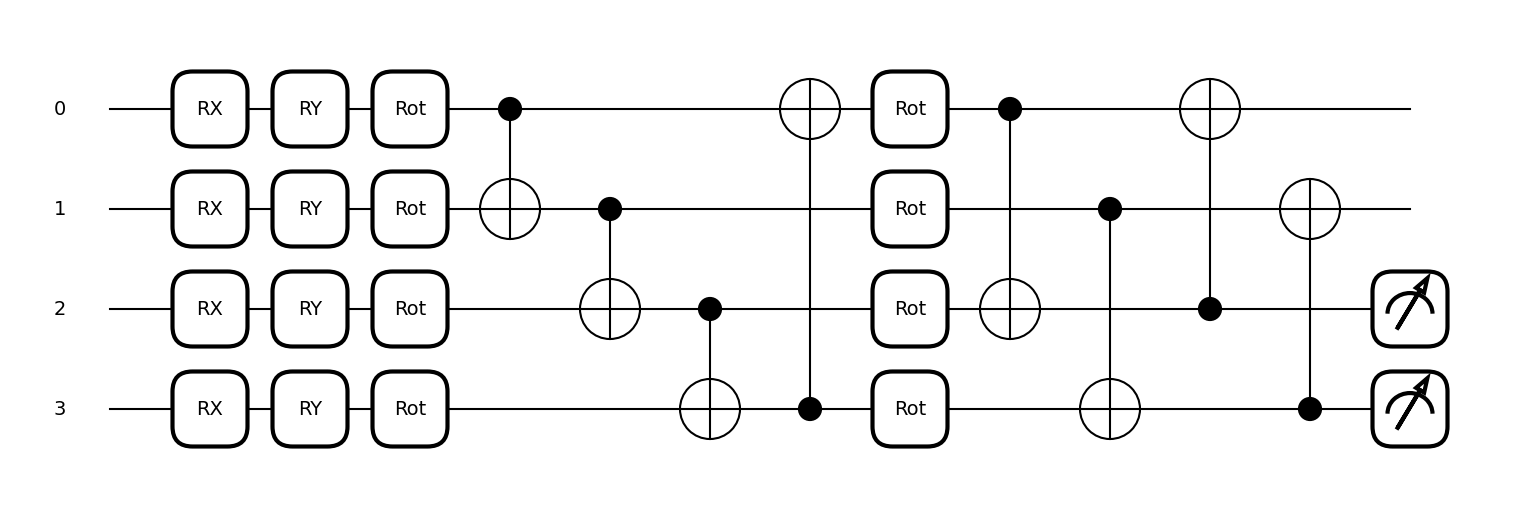

In [11]:
iris42.draw_circuit(decompose=True)

In [14]:
iris42.optimize()

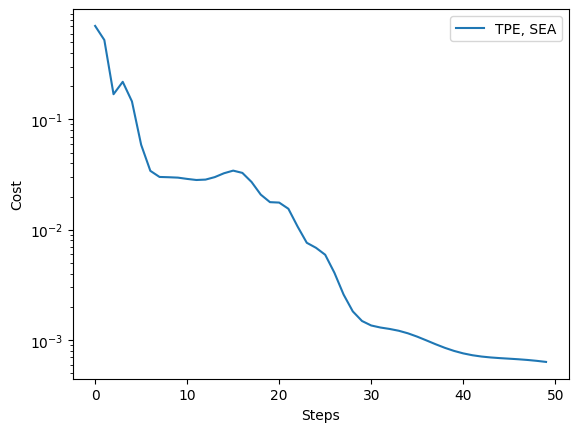

In [15]:
iris42.plot_cost()

In [16]:
print('accuracy ', iris42.accuracy(x_test, y_test))
print('optimized cost; ', iris42.cost_list[-1])

accuracy  1.0
optimized cost;  0.0006343125597014038


## 3. Iris dataset with 4 features and 3 labels

In [1]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

import sys
sys.path.append('..')
from src.quantum_classifier import *

In [2]:
import pandas as pd

# load data
data = pd.read_csv('../data/iris_scaled.csv')

X = data[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']].values[:150]
Y = data['class'].values[0:150]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [3]:
for i in range(3):
    print(x_train[i], y_train[i])

[0.55555556 0.20833333 0.66101695 0.58333333] 1
[0.5        0.25       0.77966102 0.54166667] 2
[0.22222222 0.58333333 0.08474576 0.04166667] 0


In [4]:
# settings
nqubits = X.shape[1]
embedding_nlayers = 1
ansatz_nlayers = 2
embedding_type = "ALE"
ansatz_type = "SEA"
cost_type = "LOG"
label = f"{embedding_type}, {ansatz_type}"

# optimize
iris43 = QuantumClassifier(
    x_train,
    y_train,
    nqubits,
    embedding_nlayers,
    ansatz_nlayers,
    embedding_type,
    ansatz_type,
    cost_type,
    shots=None,
    stepsize=0.3,
    steps=50,
)

(<Figure size 1600x500 with 1 Axes>, <Axes: >)

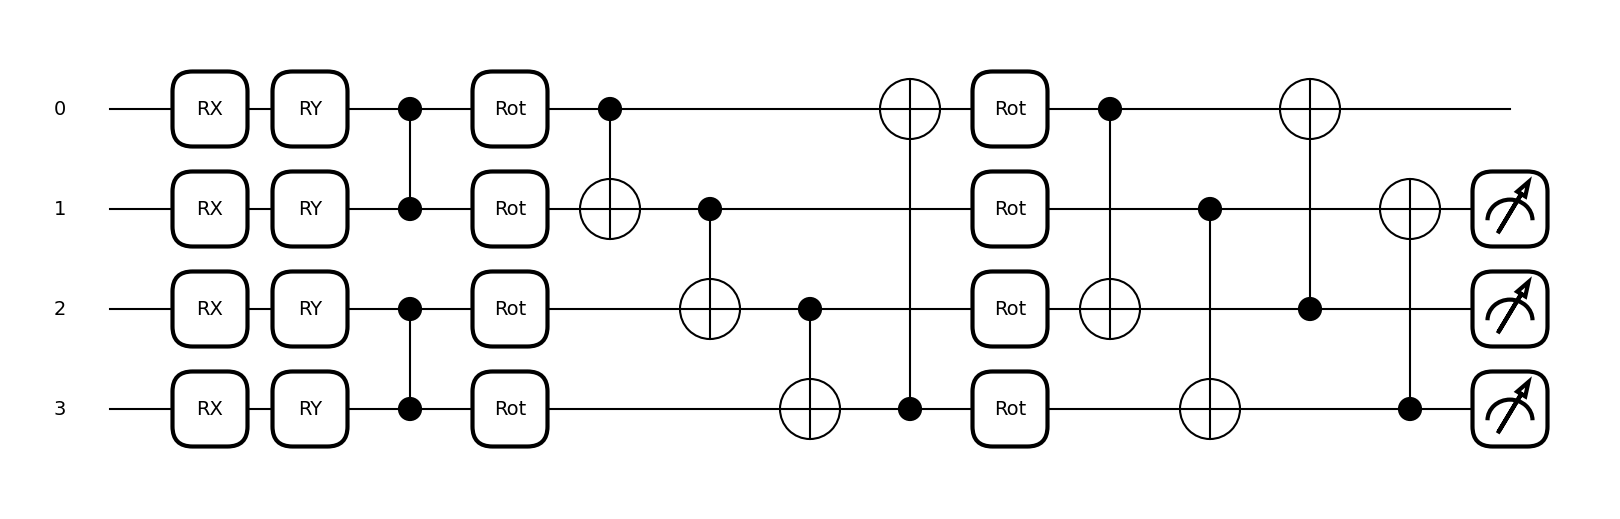

In [5]:
iris43.draw_circuit(decompose=True)

In [6]:
iris43.optimize()

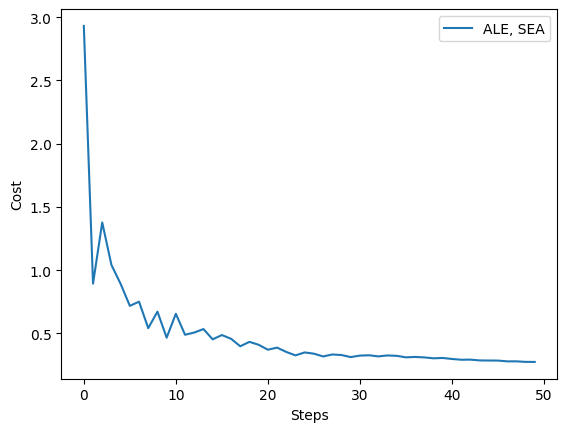

In [7]:
iris43.plot_cost()

In [8]:
print('accuracy ', iris43.accuracy(x_test, y_test))
print('optimized cost; ', iris43.cost_list[-1])

accuracy  1.0
optimized cost;  0.27458685080327105


## 4. Another dataset (2 features and 4 labels)

In [17]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

import sys
sys.path.append('..')
from src.quantum_classifier import *

In [12]:
N = 100
X = np.random.uniform(-1, 1, (N,2))
Y = np.zeros(N).astype(int)

for i,x in enumerate(X):
    if x[0] > 0:
        if x[1] > 0:
            Y[i] = 0
        else:
            Y[i] = 3
    else:
        if x[1] > 0:
            Y[i] = 1
        else:
            Y[i] = 2

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X[:5])
print(Y[:5])

[[ 0.2656368  -0.52061401]
 [-0.62301633 -0.49862437]
 [ 0.48378851  0.85666824]
 [-0.7210139  -0.46750694]
 [ 0.08699137  0.34972685]]
[3 2 0 2 0]


In [13]:
# settings
nqubits = 4
embedding_nlayers = 1
ansatz_nlayers = 2
embedding_type = "TPE"
ansatz_type = "SEA"
cost_type = "LOG"
label = f"{embedding_type}, {ansatz_type}"

quadrant = QuantumClassifier(
    x_train,
    y_train,
    nqubits,
    embedding_nlayers,
    ansatz_nlayers,
    embedding_type,
    ansatz_type,
    cost_type,
    shots=None,
    stepsize=0.3,
    steps=50,
)

(<Figure size 1500x500 with 1 Axes>, <Axes: >)

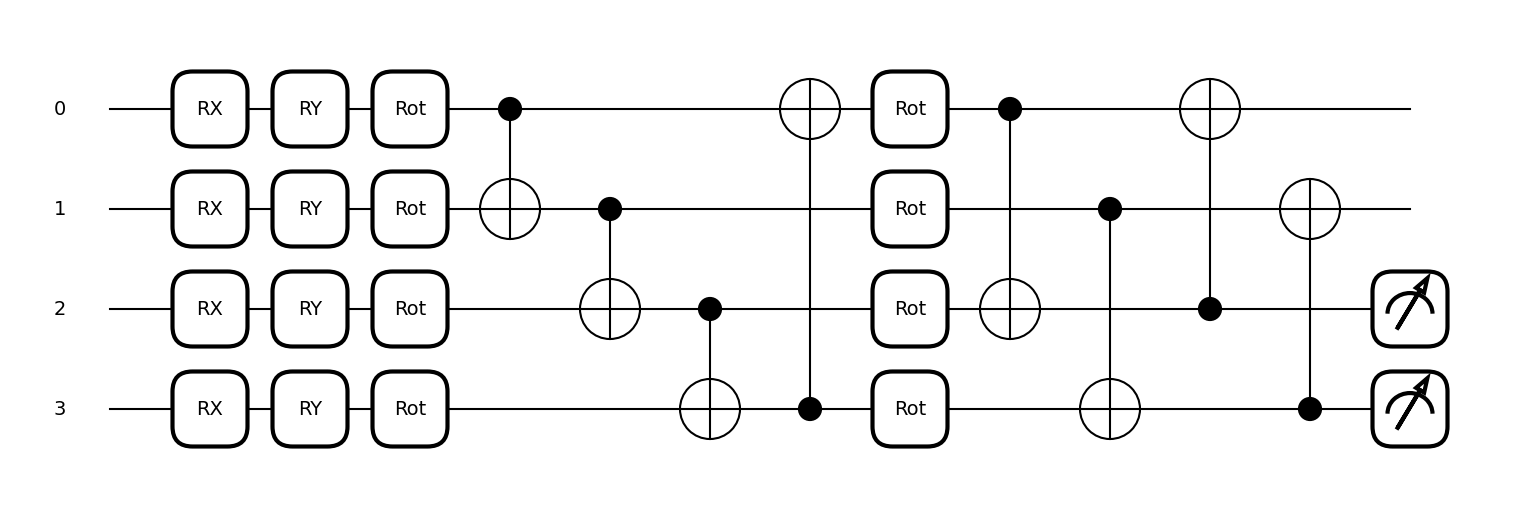

In [14]:
quadrant.draw_circuit(decompose=True)

In [41]:
quadrant.optimize()

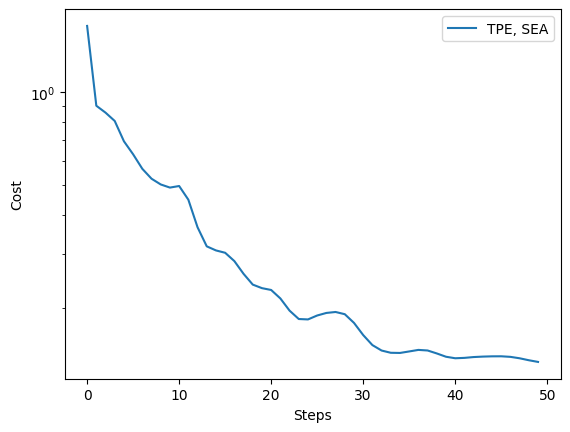

In [42]:
quadrant.plot_cost()

In [43]:
print('accuracy ', quadrant.accuracy(x_test, y_test))
print('optimized cost; ', quadrant.cost_list[-1])

accuracy  0.95
optimized cost;  0.13446899164253673


## 5. Random dataset

In [24]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

import sys
sys.path.append('..')
from src.quantum_classifier import *

In [15]:
N = 50
X = np.random.uniform(-1, 1, (N,2))
Y = np.random.randint(0, 2, N)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X[:5])
print(Y[:5])

[[-0.70786005 -0.57041085]
 [ 0.79191986  0.60766037]
 [ 0.29405073 -0.31262373]
 [ 0.28447651 -0.1509128 ]
 [-0.26195483 -0.40436469]]
[1 0 1 0 1]


In [16]:
# settings
nqubits = 4
embedding_nlayers = 1
ansatz_nlayers = 2
embedding_type = "TPE"
ansatz_type = "SEA"
cost_type = "MSE"
label = f"{embedding_type}, {ansatz_type}"

random = QuantumClassifier(
    x_train,
    y_train,
    nqubits,
    embedding_nlayers,
    ansatz_nlayers,
    embedding_type,
    ansatz_type,
    cost_type,
    shots=None,
    stepsize=0.3,
    steps=50,
)

(<Figure size 1500x500 with 1 Axes>, <Axes: >)

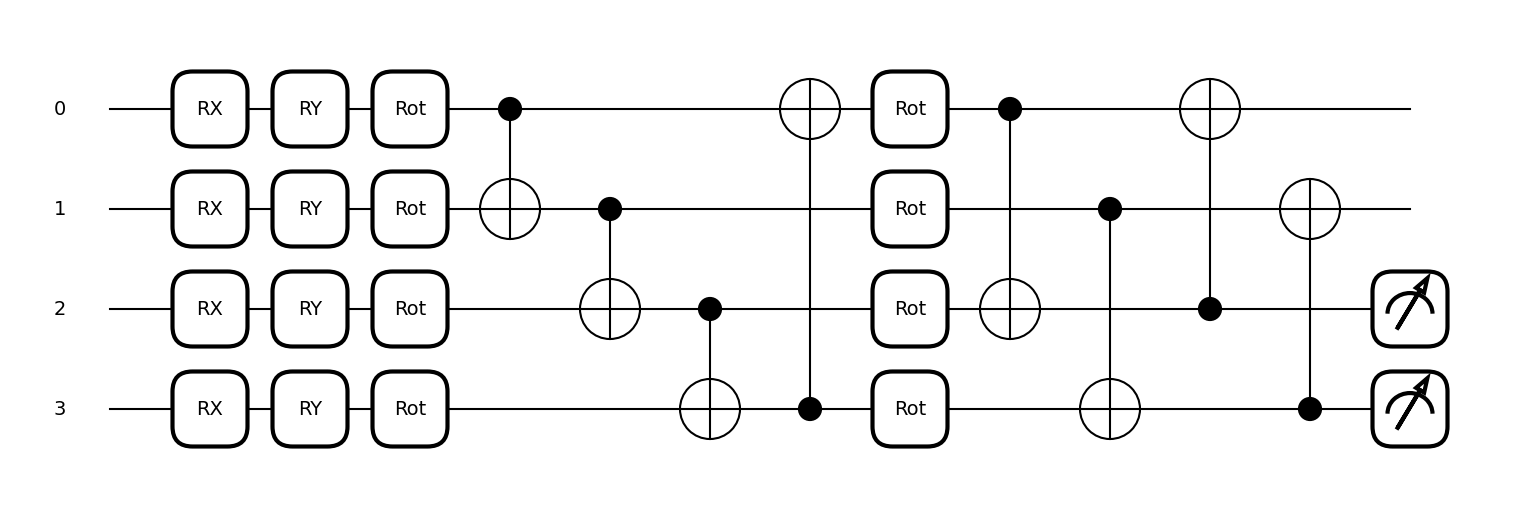

In [17]:
random.draw_circuit(decompose=True)

In [28]:
random.optimize()

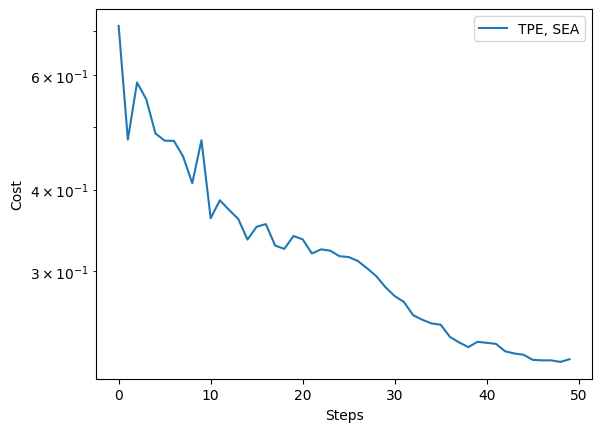

In [29]:
random.plot_cost()

In [30]:
print('accuracy ', random.accuracy(x_test, y_test))
print('optimized cost; ', random.cost_list[-1])

accuracy  0.5
optimized cost;  0.21955108090988196
